In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = '/Users/joycemungai/ds_projects/emergency_dept_files'
paed_df = pd.read_csv(file_path + '/clean_paediatric_data.csv') 
paed_df.head()

,facility_code,facility_name,month,triage_category,num_em_attendances,num_seen_on_time,percent_seen_on_time,num_left_no_treatment,percent_left_no_treatment,num_admitted,percent_admitted,num_admitted_in_four_hrs,percent_admitted_in_four_hrs
0,1,MATER HOSPITAL BRISBANE PUBLIC,2018-01-01,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,MATER HOSPITAL BRISBANE PUBLIC,2018-01-01,2,1.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,MATER HOSPITAL BRISBANE PUBLIC,2018-01-01,3,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,MATER HOSPITAL BRISBANE PUBLIC,2018-01-01,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,MATER HOSPITAL BRISBANE PUBLIC,2018-01-01,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
paed_df.describe()

,facility_code,triage_category,num_em_attendances,num_seen_on_time,percent_seen_on_time,num_left_no_treatment,percent_left_no_treatment,num_admitted,percent_admitted,num_admitted_in_four_hrs,percent_admitted_in_four_hrs
count,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000,10375.000000
mean,2358.607229,3.000000,250.860337,180.018506,76.152126,7.361735,1.851323,47.854458,17.822835,28.139566,40.429933
std,14703.567484,1.414282,1153.302321,811.551885,32.667135,39.031480,3.595536,231.620935,26.372115,135.910994,39.971153
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,2.000000,3.000000,3.000000,69.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.000000,3.000000,22.000000,20.000000,89.500000,0.000000,0.000000,1.000000,4.000000,1.000000,39.530000
75%,200.000000,4.000000,145.000000,112.000000,100.000000,2.000000,2.815000,16.000000,26.990000,9.000000,75.610000
max,99999.000000,5.000000,15627.000000,11901.000000,100.000000,949.000000,67.000000,3450.000000,100.000000,1965.000000,100.000000


In [4]:
paed_df.month.sort_values().unique()

array(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
       '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
       '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
       '2016-07-01', '2016-08-01', '2016-10-01', '2016-11-01',
       '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-10-01'], dtype=object)

In [5]:
paed_df.facility_name.nunique()

112

A performance analysis of the paediatric emergency department in the Queensland Hospitals between 2015 and 2019.
Answering the following questions:
1. What is the trend of patients attending emergency dept over time per triage category?
2. Which hospitals are more busy? 
3. Were patients seen within appropriate times?
4. How does being seen on time compare in busy hospitals


In [8]:
paed_df.triage_category = paed_df.triage_category.astype('category')
#Triage categories and after how long patients should be seen on arrival
#ATS 1	Immediate
#ATS 2	10 minutes
#ATS 3	30 minutes
#ATS 4	60 minutes
#ATS 5	120 minutes

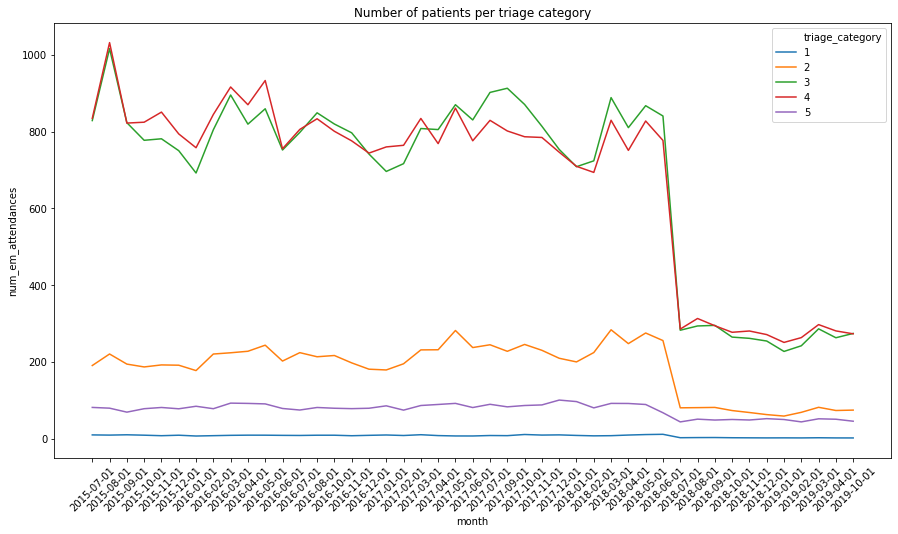

In [20]:
#trend analysis on attendances over time
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
attendances = sns.lineplot(x="month", y="num_em_attendances", ax=ax, data=paed_df, hue="triage_category", ci=None )
attendances.set_title("Number of patients per triage category")
plt.xticks(rotation=45)
plt.show()

There seems to be consistently low number of patients that require immediate attention for all hospitals in Queensland. Most patients fall in the 3rd and 4th triage category with the number of attendances ranging from 650-1000 between 2015 and 2018 June

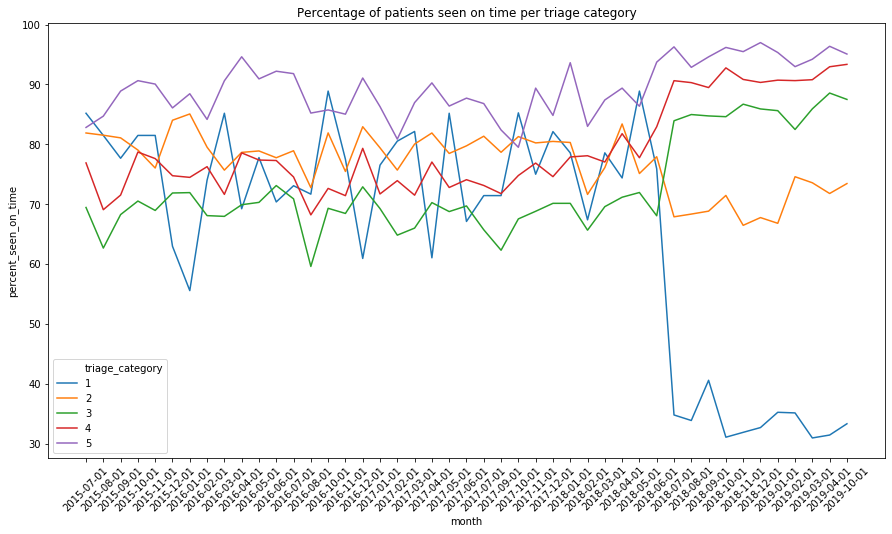

In [21]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ontime=sns.lineplot(x="month", y="percent_seen_on_time", ax=ax, data=paed_df, hue="triage_category", ci=None )
ontime.set_title("Percentage of patients seen on time per triage category")
plt.xticks(rotation=45)
plt.show()

Category 1 seems to have a fractuating percentage of patients seen on time. About 50% of the category 1 data has zero patients which brings the average percent down every other month. 
Other categories have improved percentage from April 2018 onwards

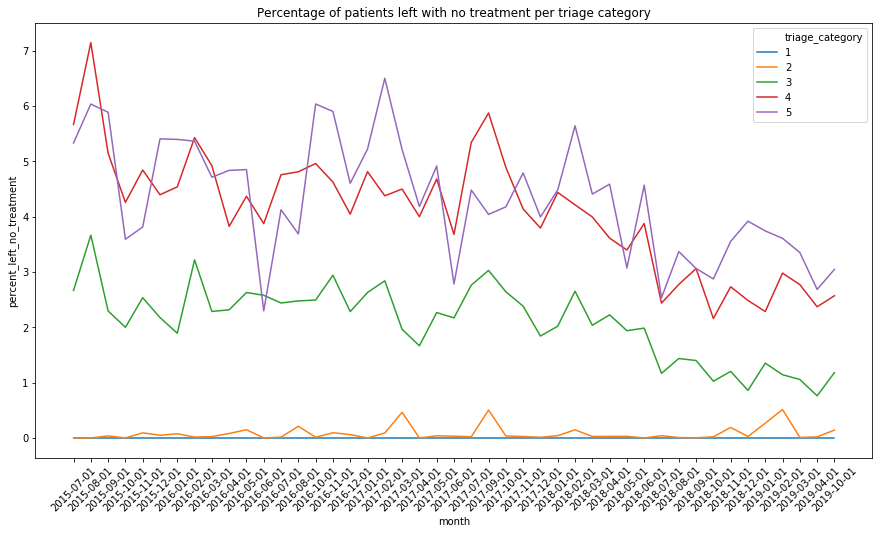

In [22]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
notreatment = sns.lineplot(x="month", y="percent_left_no_treatment", ax=ax, data=paed_df, hue="triage_category", ci=None )
notreatment.set_title("Percentage of patients left with no treatment per triage category")
plt.xticks(rotation=45)
plt.show()

The percentage of patients that leave with no treatment has a downward trend. This can be associated with hospitals having improved percentage of patients seen on time. 

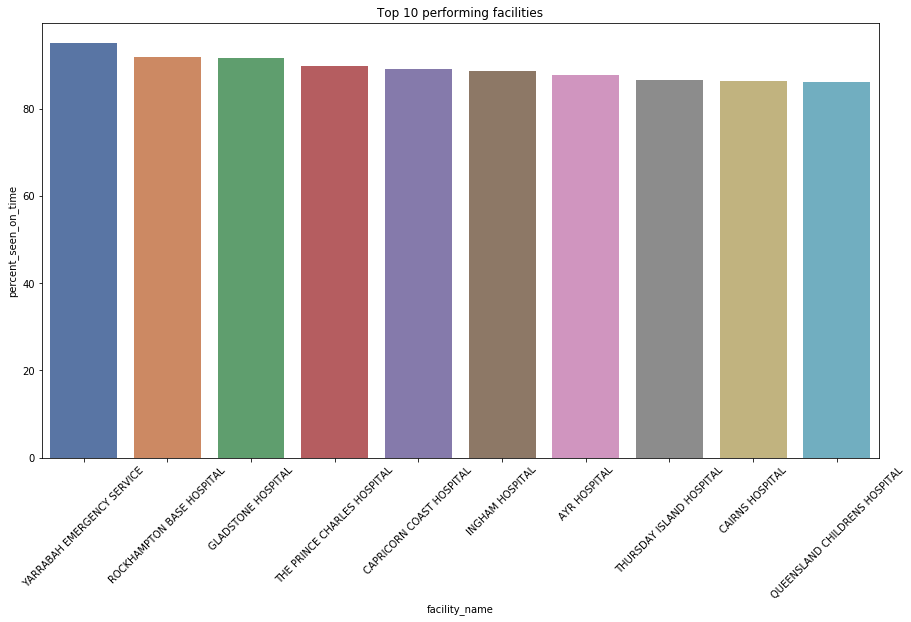

In [45]:
facilities = paed_df.groupby(['facility_name'],as_index=False)['percent_seen_on_time'].mean()
top_10_facilities = facilities.sort_values(by='percent_seen_on_time',ascending=False)[:10]

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
notreatment = sns.barplot(x="facility_name", y="percent_seen_on_time", ax=ax, data=top_10_facilities, palette="deep")
notreatment.set_title("Top 10 performing facilities")
plt.xticks(rotation=45)
plt.show()
